<a id='top_of_notebook'></a>

# Sampling Methods

In [1]:
import pandas as pd
from random import choice
from random import randint
from random import randrange

#### Sampling Strategy
- The method chosen for sampling depends on the nature of the population and the resources available in terms of time and money.
- The sampling method selected should be the one that produces the best results for the resources available.
- If the sample has known bias, this should be taking into account in analysis and reporting.

#### Unbiased Sample (the ideal)
- Each object (observation) in the population is equally likely to be chosen as part of the sample.
- The sample is representative of the entire population.

#### Biased Samples
- Occurs when one or more parts of the population are favored over others.
- Two types of biased samples:
    - Convenience sample
    - Voluntary Response Sample

#### Representative
- It is also desirable for the sample to be representative of the population.
- If the population is two-thirds green and one-third red, the sample should be equally split.

#### Variations
- There will also be sampling errors or variations due to sampling.

#### Sampling Frame
- sampling frame is a concise list of all the objects (observations) in a population, from which a sample is to be chosen.

Note: load dataset, prior to running any of the demostrated sampling methods.

[Load Dataset](#load_dataset)

<a id='selection_box'></a>

## Demonstrated Sampling Methods (selection box)

- [Simple Random Sample](#simple_random_sample)
- [Systematic Sampling](#systematic_sampling)
- [Cluster Sampling](#cluster_sampling)
- [Stratified Sampling](#stratified_sampling)
- [Multistage Sampling](#multistage_sampling)

## ---------------------------------------------------------------------------------------------

<a id='load_dataset'></a>

### load the population dataset (from which sampling will be drawn)

In [2]:
population = pd.read_csv("population.csv",
                         usecols=['FullName','Race','Gender','Age','Height','Weight','State'] )
population.index = pd.Index(i for i in range(1,5001,1))
display(population.info())
display(population.shape)
display(population.head(10))
display(population.tail(10))

# eof variable is used in selection processes as the 'stop' point in a range.
# Must be number of rows + 1 because the eof is not included in the range.
# This ensures the last row is included in the range.

eof = population.shape[0] + 1
display(eof)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 7 columns):
Age         5000 non-null int64
FullName    5000 non-null object
Gender      5000 non-null object
Height      5000 non-null float64
Race        5000 non-null object
State       5000 non-null object
Weight      5000 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 312.5+ KB


None

(5000, 7)

,Age,FullName,Gender,Height,Race,State,Weight
1,18,Payton C. Cole,M,64.45,W,GA,201
2,66,Andres J. Brown,M,68.00,W,NY,161
3,41,Wayne C. Robinson,M,73.41,W,CA,177
4,41,Jamie N. Johnson,F,58.89,W,NY,181
5,66,Jordan H. Fields,F,65.11,B,RI,144
6,69,Nathan J. Rogers,M,69.16,W,DE,152
7,18,Kathryn M. Nichols,F,60.49,W,PA,165
8,62,Kevin F. Jones,M,71.43,W,MS,211
9,71,Alexia L. Hill,F,63.45,W,WI,112
10,57,Fay N. Harris,F,67.65,W,NY,127


,Age,FullName,Gender,Height,Race,State,Weight
4991,62,Michele I. Wood,F,60.93,W,OH,142
4992,31,Elmer D. Cook,M,73.98,W,TX,180
4993,34,Janice J. Carter,F,67.35,W,DE,175
4994,47,Jeanne N. Johnson,F,60.94,W,CO,146
4995,34,Vicki R. Jordan,F,66.00,W,TX,192
4996,65,Sharise H. Franklin,F,60.47,B,NC,155
4997,31,Chante C. Gray,M,78.59,B,RI,166
4998,72,Nancy A. Stewart,F,60.11,W,FL,131
4999,20,Sarah E. Phillips,F,60.31,W,NE,192
5000,63,Willie F. Henry,M,67.99,B,PA,159


5001

- [top of notebook](#top_of_notebook)
- [selection box](#selection_box)
- [load dataset](#load_dataset)

## ---------------------------------------------------------------------------------------------

<a id='simple_random_sample'></a>


# Simple Random Sample (SRS)
- The most ideal method for sampling.
- Assign each object (observation) in the population a unique number tag (UNT).
- Use random process to select sample from these UNTs.
- Each object is equally likely to be selected.
- This produces an unbiased sample, which is hoped to be representative.
    
The dataframe index  is used as the UNT.

In [3]:
# use a random process to select a list of unique number tags from the available population tags.
List = []
for index in range (0,20):
    List.append(randrange(1,eof))
print(List)

[1037, 1334, 1887, 1130, 1773, 3708, 1086, 4282, 2585, 891, 2095, 3692, 4294, 2882, 1170, 4455, 4780, 63, 3246, 4297]


In [4]:
# pull the observations into the samples for the randomly generated list of unique number tags.
sample = population.loc[List]
display(sample)

,Age,FullName,Gender,Height,Race,State,Weight
1037,72,Minnie A. Adams,F,62.92,W,AL,143
1334,54,Tanner G. Hall,M,70.31,W,UT,202
1887,19,Bernadette G. Owens,F,62.48,W,MS,156
1130,50,Stacey A. Morris,F,69.28,W,NE,162
1773,54,Hannah E. Wallace,F,61.24,B,FL,153
3708,65,Jeffrey F. Hoffman,M,70.75,W,NC,191
1086,36,Brittany A. Wright,F,62.69,W,WA,120
4282,30,Pakuna D. Long,F,62.93,I,OK,138
2585,24,Darrell C. Murray,M,65.54,W,MA,164
891,20,Alexia E. Allen,F,63.75,W,TX,134


In [5]:
# write the simple random sample to a csv file
sample.to_csv('SimpleRandomSample.csv',index=False)

- [top of notebook](#top_of_notebook)
- [selection box](#selection_box)
- [load dataset](#load_dataset)

## ---------------------------------------------------------------------------------------------

<a id='systematic_sampling'></a>

# Systematic Sampling
- Choose a starting point at random
- Then systematically select objects at a defined interval.
- Example: If there were 1,000 objects in a population and you wanted a sample of 50, you would take every 20th object.
- However, if there is a pattern in the population certain types of objects could be chosen more/less often than others.

In [6]:
# choose a starting point at random
starting_point = randint(1, 5)
display(starting_point)

3

In [7]:
# define interval
interval = 5

In [8]:
# systematically select objects from the population:
# starting at the randomly selected starting point
# using a defined interval
List = [i for i in range(starting_point,eof,interval)]
display(len(List))
print(List)

1000

[3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93, 98, 103, 108, 113, 118, 123, 128, 133, 138, 143, 148, 153, 158, 163, 168, 173, 178, 183, 188, 193, 198, 203, 208, 213, 218, 223, 228, 233, 238, 243, 248, 253, 258, 263, 268, 273, 278, 283, 288, 293, 298, 303, 308, 313, 318, 323, 328, 333, 338, 343, 348, 353, 358, 363, 368, 373, 378, 383, 388, 393, 398, 403, 408, 413, 418, 423, 428, 433, 438, 443, 448, 453, 458, 463, 468, 473, 478, 483, 488, 493, 498, 503, 508, 513, 518, 523, 528, 533, 538, 543, 548, 553, 558, 563, 568, 573, 578, 583, 588, 593, 598, 603, 608, 613, 618, 623, 628, 633, 638, 643, 648, 653, 658, 663, 668, 673, 678, 683, 688, 693, 698, 703, 708, 713, 718, 723, 728, 733, 738, 743, 748, 753, 758, 763, 768, 773, 778, 783, 788, 793, 798, 803, 808, 813, 818, 823, 828, 833, 838, 843, 848, 853, 858, 863, 868, 873, 878, 883, 888, 893, 898, 903, 908, 913, 918, 923, 928, 933, 938, 943, 948, 953, 958, 963, 968, 973, 978, 983, 988, 993, 998, 1003, 1008, 1013, 101

In [9]:
# pull the observations into the samples for the systematically generated list.
sample = population.loc[List]
display(sample.head())
display(sample.tail())

,Age,FullName,Gender,Height,Race,State,Weight
3,41,Wayne C. Robinson,M,73.41,W,CA,177
8,62,Kevin F. Jones,M,71.43,W,MS,211
13,62,Jack J. Butler,M,65.03,W,PA,179
18,57,Alisha M. Avila,F,58.87,H,FL,158
23,52,Anita H. Thomas,F,60.88,W,CA,139


,Age,FullName,Gender,Height,Race,State,Weight
4978,47,Sandra L. Morris,F,61.15,W,IL,127
4983,72,Jose D. Stone,M,72.86,W,ND,180
4988,58,Kasen C. Butler,M,68.29,W,PA,168
4993,34,Janice J. Carter,F,67.35,W,DE,175
4998,72,Nancy A. Stewart,F,60.11,W,FL,131


In [10]:
# write the systematic sample to a csv file
sample.to_csv('SystematicSample.csv',index=False)

- [top of notebook](#top_of_notebook)
- [selection box](#selection_box)
- [load dataset](#load_dataset)

## ---------------------------------------------------------------------------------------------

<a id='cluster_sampling'></a>

# Cluster Sampling
	• The population is divided into clusters, and then a cluster is chosen at random.
	• The process at diving the population into clusters must not include the parameter being measured.
	• Example: if doing a study on weight, the clusters cannot be defined by weight.
	• Example: Departments of a business can be clusters or neighborhoods within a city.
	• When a cluster is randomly chosen, all of the objects within the cluster are randomly chosen.
	• Cluster sampling can be more convenient and practical than simple random sampling.
	• However, if the clusters are different from each other with regard to the parameter being measured, this can lead to bias or non-representativeness in the sample.

In [11]:
# add a new column to the dataframe called 'cluster', temporalily valued at 0
population['cluster'] = int(0)
display(population[['cluster','FullName']].head(5))

,cluster,FullName
1,0,Payton C. Cole
2,0,Andres J. Brown
3,0,Wayne C. Robinson
4,0,Jamie N. Johnson
5,0,Jordan H. Fields


### assign each observation in the population to one of the clusters

In [12]:
# specify the number of clusters
number_of_clusters = 5

cluster_number = 0
for i, v in population['cluster'].iteritems(): # iterate thru the observations
    
    # cycle thru cluster numbers
    cluster_number = cluster_number + 1
    if cluster_number > number_of_clusters:
        cluster_number = 1

    # assign cluster number to the observation
    population.at[i, 'cluster'] = cluster_number

display(population[['cluster','FullName']].head(10))
display(population[['cluster','FullName']].tail(10))

,cluster,FullName
1,1,Payton C. Cole
2,2,Andres J. Brown
3,3,Wayne C. Robinson
4,4,Jamie N. Johnson
5,5,Jordan H. Fields
6,1,Nathan J. Rogers
7,2,Kathryn M. Nichols
8,3,Kevin F. Jones
9,4,Alexia L. Hill
10,5,Fay N. Harris


,cluster,FullName
4991,1,Michele I. Wood
4992,2,Elmer D. Cook
4993,3,Janice J. Carter
4994,4,Jeanne N. Johnson
4995,5,Vicki R. Jordan
4996,1,Sharise H. Franklin
4997,2,Chante C. Gray
4998,3,Nancy A. Stewart
4999,4,Sarah E. Phillips
5000,5,Willie F. Henry


### randomly choose which cluster to use as the sample

In [13]:
cluster_choice = randint(1, number_of_clusters)
print("randomly chosen cluster: ", cluster_choice)
sample = population.loc[(population['cluster'] == cluster_choice)]
display(sample.head())
display(sample.tail())

randomly chosen cluster:  4


,Age,FullName,Gender,Height,Race,State,Weight,cluster
4,41,Jamie N. Johnson,F,58.89,W,NY,181,4
9,71,Alexia L. Hill,F,63.45,W,WI,112,4
14,34,Regina E. Gibson,F,64.12,W,CA,166,4
19,20,Joel J. Mcdonald,M,71.24,W,CA,215,4
24,37,Arthur A. Watson,M,69.22,W,MS,182,4


,Age,FullName,Gender,Height,Race,State,Weight,cluster
4979,61,Anacita E. Cabrera,F,54.77,H,MA,144,4
4984,53,Adrien A. Dixon,M,69.82,B,NC,163,4
4989,75,Carla A. Campbell,F,62.76,W,NE,146,4
4994,47,Jeanne N. Johnson,F,60.94,W,CO,146,4
4999,20,Sarah E. Phillips,F,60.31,W,NE,192,4


In [14]:
# write the cluster sample to a csv file
sample.to_csv('ClusterSample.csv',index=False)

### BONUS
- Load clusters into a dictionary
- Convert dictionaried clusters to dataframes
- Write dataframe clusters to individual .csv files

In [15]:
cluster_dictionary = {}

for c in range(1,number_of_clusters+1,1):

    # assign name for each indivual cluster file
    cluster_name = "cluster" + str(c) + ".csv"
    
    # load cluster into dictionary: key = cluster number, value = dataframe
    cluster_dictionary[c] = population.loc[(population['cluster'] == c)]
    
    # create a stand alone dataframe from the cluster stored in the dictionary
    cluster_df = pd.DataFrame(cluster_dictionary[c])
    display(cluster_df.head())
    
    # write the cluster to a csv file
    cluster_df.to_csv(cluster_name,index=False)

,Age,FullName,Gender,Height,Race,State,Weight,cluster
1,18,Payton C. Cole,M,64.45,W,GA,201,1
6,69,Nathan J. Rogers,M,69.16,W,DE,152,1
11,67,Roman J. Fox,M,69.67,W,VT,188,1
16,36,Edward J. Wallace,M,68.86,W,PA,176,1
21,56,Leopoldo S. Barrera,M,65.21,H,FL,168,1


,Age,FullName,Gender,Height,Race,State,Weight,cluster
2,66,Andres J. Brown,M,68.00,W,NY,161,2
7,18,Kathryn M. Nichols,F,60.49,W,PA,165,2
12,67,Carsandra A. Robinson,F,63.07,B,DE,124,2
17,21,Kasen A. Ross,M,70.57,W,CA,158,2
22,34,Nevaeh M. Bell,F,64.99,B,UT,122,2


,Age,FullName,Gender,Height,Race,State,Weight,cluster
3,41,Wayne C. Robinson,M,73.41,W,CA,177,3
8,62,Kevin F. Jones,M,71.43,W,MS,211,3
13,62,Jack J. Butler,M,65.03,W,PA,179,3
18,57,Alisha M. Avila,F,58.87,H,FL,158,3
23,52,Anita H. Thomas,F,60.88,W,CA,139,3


,Age,FullName,Gender,Height,Race,State,Weight,cluster
4,41,Jamie N. Johnson,F,58.89,W,NY,181,4
9,71,Alexia L. Hill,F,63.45,W,WI,112,4
14,34,Regina E. Gibson,F,64.12,W,CA,166,4
19,20,Joel J. Mcdonald,M,71.24,W,CA,215,4
24,37,Arthur A. Watson,M,69.22,W,MS,182,4


,Age,FullName,Gender,Height,Race,State,Weight,cluster
5,66,Jordan H. Fields,F,65.11,B,RI,144,5
10,57,Fay N. Harris,F,67.65,W,NY,127,5
15,36,Beatrice M. Hayes,F,73.61,W,NC,126,5
20,76,Ralph D. Reynolds,M,69.64,W,MS,167,5
25,72,Amanda M. Scott,F,64.14,W,FL,125,5


#### Besides the individual .csv files created from the clusters, the individuals clusters are available in dictionary slots.

In [16]:
# cluster 1, first five observations
display(cluster_dictionary[1][0:5])

,Age,FullName,Gender,Height,Race,State,Weight,cluster
1,18,Payton C. Cole,M,64.45,W,GA,201,1
6,69,Nathan J. Rogers,M,69.16,W,DE,152,1
11,67,Roman J. Fox,M,69.67,W,VT,188,1
16,36,Edward J. Wallace,M,68.86,W,PA,176,1
21,56,Leopoldo S. Barrera,M,65.21,H,FL,168,1


In [17]:
# cluster 2, FullName feature of first five observation in the cluster
display(cluster_dictionary[2][0:5]['FullName']) 

2           Andres J. Brown
7        Kathryn M. Nichols
12    Carsandra A. Robinson
17            Kasen A. Ross
22           Nevaeh M. Bell
Name: FullName, dtype: object

In [18]:
# cluster 3, FullNamee feature of observation 4 in the cluster 
display(cluster_dictionary[3][3:4]['FullName'])

18    Alisha M. Avila
Name: FullName, dtype: object

- [top of notebook](#top_of_notebook)
- [selection box](#selection_box)
- [load dataset](#load_dataset)

## ---------------------------------------------------------------------------------------------

<a id='stratified_sampling'></a>

# Stratified Sampling
	• This method can seem like cluster sampling
	• However, the "strata" or groups are chosen specifically to represent different characteristics within the population
	• Such as: ethnicity, age, location, or occupation.
	• Within each group a random sample is taken sometimes in proportion to the number of objects within the group.
	• This method can lead to a very good random, representative, and unbiased sample.

In [19]:
total_population = population.shape[0]
display(total_population)

5000

In [20]:
# define the desired sample proportion: the percentage of the population to be in the sample
sample_proportion = .20  #   20%

In [21]:
# calculation desired sample size: count
sample_count = round(total_population * sample_proportion)
display(sample_count)

1000

In [22]:
# define a minimum count threshold for a race to be included in the sample.
# a race must have at least this miniumum number of observations in the population to be included in the sample.
race_inclusion_threshold = 80

In [23]:
# define the minimum number of observation to included in the sample per incuded race
minimum_observations_threshold = 10

In [24]:
race_dictionary = {"A":"Arab", "B":"Black", "H":"Hispanic", "O":"Oriental", "W":"White", "I":"Indian", "X":"Other"}

In [25]:
# show counts of each racial group in the total population
race_counts = population['Race'].value_counts().sort_index()
print(race_counts)
print(type(race_counts))

A      75
B     632
H     433
I      88
O     114
W    3658
Name: Race, dtype: int64
<class 'pandas.core.series.Series'>


In [26]:
display(race_counts.index)
display(race_counts.index[0])
display(race_counts[0])

Index(['A', 'B', 'H', 'I', 'O', 'W'], dtype='object')

'A'

75

#### - Racial catagory "Arab" will be excluded from the sample.
#### -This racial category did not meet the observation minimum threshold count in the population

In [27]:
print("minimum observation count in population for racial catagory to be included in sample: " + str(race_inclusion_threshold))

racial_categories = race_counts[race_counts >= race_inclusion_threshold]
display(racial_categories)
display(racial_categories.index)

minimum observation count in population for racial catagory to be included in sample: 80


B     632
H     433
I      88
O     114
W    3658
Name: Race, dtype: int64

Index(['B', 'H', 'I', 'O', 'W'], dtype='object')

#### Create proportial dictionary: the number of observation randomly selected to be included in the sample from each strata, will correspond to the racial proportion in the population.

In [28]:
inclusion_sum           = 0
largest_proportion      = 0
largest_racial_category = " "
racial_count_dictionary = {}
   
for (race, racial_count) in racial_categories.iteritems():    

    racial_proportion = (racial_count / total_population)
    if racial_proportion > largest_proportion:
        largest_proportion      = racial_proportion
        largest_racial_category = race

    racial_sample_count = round((sample_count * racial_proportion))

    racial_count_dictionary[race] = racial_sample_count
   
    inclusion_sum = inclusion_sum + racial_sample_count    

In [29]:
# because neither a population nor a sample can contain a fraction of an observation, and calculating proportions can produce
# fractions of an observation; rounding must be used. This leads to the sum of the number of observation to include by
# racial category to be slitely less or more than the desired sample count. Therefore, the racial_count_dictionary must be 
# adjusted by either substracting or adding the difference to the racial category with the highest proportion in the population. 

if inclusion_sum < sample_count:
    adjustment = round(sample_count - inclusion_sum)
    racial_count_dictionary[largest_racial_category] = (racial_count_dictionary[largest_racial_category] + adjustment)
elif inclusion_sum > sample_count:
    adjustment = round(inclusion_sum - sample_count)
    racial_count_dictionary[largest_racial_category] = (racial_count_dictionary[largest_racial_category] - adjustment)    
    
print("Number of observation from each racial category to be included in the sample: \n")
display(racial_count_dictionary)
display(sum(racial_count_dictionary.values()))

Number of observation from each racial category to be included in the sample: 



{'B': 126, 'H': 87, 'I': 18, 'O': 23, 'W': 746}

1000

### Create racial stratas and stratified sample

In [30]:
# create empty data to store the sample, using the same structure as the population dataframe
column_list = (population.columns)
sample = pd.DataFrame(columns=column_list)
display(sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
Age         0 non-null object
FullName    0 non-null object
Gender      0 non-null object
Height      0 non-null object
Race        0 non-null object
State       0 non-null object
Weight      0 non-null object
cluster     0 non-null object
dtypes: object(8)
memory usage: 0.0+ bytes


None

In [31]:
#sample = pd.DataFrame()

strata_dictionary = {}

for race in racial_categories.index:
       
    display(race)
   
    # assign name for each indivual racial strata file
    strata_csv_name = "strata_" + race_dictionary[race] + ".csv"
    display(strata_csv_name)
    
    # load racial strata into dictionary: key = race abreviation, value = dataframe
    strata_dictionary[race] = population.loc[(population['Race'] == race)]
    
    # create a stand alone dataframe from the racial strata stored in the dictionary
    strata_df = pd.DataFrame(strata_dictionary[race])
    display(strata_df.head())   
    
    # Append the appropriate number of randomly selected observations from the racial strata into the sample
    # as defined in the racial count dictionary. 
    sample = sample.append(strata_df.sample(racial_count_dictionary[race],replace=False),ignore_index=True)    
    
    # write the racial strata to a csv file
    strata_df.to_csv(strata_csv_name,index=False)

'B'

'strata_Black.csv'

,Age,FullName,Gender,Height,Race,State,Weight,cluster
5,66,Jordan H. Fields,F,65.11,B,RI,144,5
12,67,Carsandra A. Robinson,F,63.07,B,DE,124,2
22,34,Nevaeh M. Bell,F,64.99,B,UT,122,2
31,43,Marquis J. Crawford,M,70.51,B,ME,159,1
35,39,Shantice J. Miller,F,64.06,B,GA,188,5


'H'

'strata_Hispanic.csv'

,Age,FullName,Gender,Height,Race,State,Weight,cluster
18,57,Alisha M. Avila,F,58.87,H,FL,158,3
21,56,Leopoldo S. Barrera,M,65.21,H,FL,168,1
32,35,Hernando G. Estrada,M,59.64,H,NY,205,2
39,61,Ethan D. Santos,M,68.72,H,GA,191,4
40,26,Claritaclaudina C. Guzman,F,64.99,H,WI,194,5


'I'

'strata_Indian.csv'

,Age,FullName,Gender,Height,Race,State,Weight,cluster
84,40,Biyen D. Collins,M,67.47,I,VA,170,4
114,55,Kasa D. Cox,M,65.52,I,FL,187,4
174,66,Mahpee I. Rainwater,F,57.39,I,FL,155,4
329,37,Alenia A. Harvey,M,71.16,I,MS,158,4
392,60,Lequoia H. Whitebird,F,60.43,I,CO,158,2


'O'

'strata_Oriental.csv'

,Age,FullName,Gender,Height,Race,State,Weight,cluster
33,39,Arun W. Leung,M,63.72,O,CA,158,3
209,52,Sakaë A. Pan,F,62.67,O,TX,145,4
222,46,Guowei D. Cheng,M,67.27,O,NV,216,2
223,70,Siyu J. Her,M,68.33,O,CO,164,3
325,46,Katsu A. Singh,M,64.43,O,KS,149,5


'W'

'strata_White.csv'

,Age,FullName,Gender,Height,Race,State,Weight,cluster
1,18,Payton C. Cole,M,64.45,W,GA,201,1
2,66,Andres J. Brown,M,68.00,W,NY,161,2
3,41,Wayne C. Robinson,M,73.41,W,CA,177,3
4,41,Jamie N. Johnson,F,58.89,W,NY,181,4
6,69,Nathan J. Rogers,M,69.16,W,DE,152,1


In [32]:
# write the stratified sample to a csv file
sample.to_csv("StratifiedSample.csv",index=False)

#### Stratified Sample:

In [33]:
display(sample.shape[0])
display(sample.head(10))
display(sample.tail(10))

1000

,Age,FullName,Gender,Height,Race,State,Weight,cluster
0,30,Sterlin M. Franklin,M,68.41,B,KS,155,2
1,23,Akil D. Powell,M,74.66,B,VT,199,4
2,53,Rodell J. Sims,M,74.24,B,MA,179,3
3,76,Clayton F. Russell,M,59.55,B,OH,187,3
4,21,Raven I. Powell,F,59.83,B,CA,112,2
5,40,Santana R. Woods,M,72.53,B,ME,216,3
6,39,Shaquand J. Parker,F,66.74,B,VT,116,2
7,18,Shandee M. Martin,F,58.39,B,GA,202,1
8,39,Chantoya M. Watkins,F,66.35,B,NY,163,1
9,58,Colby J. Hughes,M,61.03,B,ID,167,5


,Age,FullName,Gender,Height,Race,State,Weight,cluster
990,67,Leonardo F. Ross,M,72.39,W,MI,173,4
991,30,Tara I. Moore,F,62.26,W,NC,158,1
992,20,Kase S. Powell,M,68.87,W,HI,169,1
993,21,Kashton J. Russell,M,75.83,W,VA,163,3
994,62,Bryan E. Fisher,M,69.55,W,NY,163,4
995,35,Eugene M. Ryan,M,70.69,W,PA,167,1
996,32,Shawn C. Moore,M,70.51,W,WA,147,4
997,76,Norman J. Martin,M,64.65,W,NY,172,2
998,27,Cynthia M. Moore,F,68.87,W,MT,163,2
999,28,Ernest E. Rogers,M,69.65,W,WV,229,2


- [top of notebook](#top_of_notebook)
- [selection box](#selection_box)
- [load dataset](#load_dataset)

## ---------------------------------------------------------------------------------------------

<a id='multistage_sampling'></a>

# Multistage Sampling
	• Similar to cluster sampling except with an extra step.
	• The population is divided into clusters or groups.
	• One cluster is chosen using an SRS.
	• Then, from within the chosen cluster, another SRS is used to pick a desired number of objects from that group.

## Stage 1: Divide the population in clusters

In [34]:
# create a list of the desired number of clusters
cluster_choices = [i for i in range(1,6,1)]
print(cluster_choices)

[1, 2, 3, 4, 5]


In [35]:
# add a new column to the dataframe called 'cluster', temporalily valued at 0
population['cluster'] = int(0)
display(population[['cluster','FullName']].head(3))
display(population[['cluster','FullName']].tail(3))

,cluster,FullName
1,0,Payton C. Cole
2,0,Andres J. Brown
3,0,Wayne C. Robinson


,cluster,FullName
4998,0,Nancy A. Stewart
4999,0,Sarah E. Phillips
5000,0,Willie F. Henry


In [36]:
# assign each object (observation) in the population a random cluster choice
# populate the new 'cluster' column with a random choice of available cluster numbers
for i, v in population['cluster'].iteritems():
    population.at[i, 'cluster'] = choice(cluster_choices)
display(population[['cluster','FullName']].head(10))
display(population[['cluster','FullName']].tail(10))

,cluster,FullName
1,2,Payton C. Cole
2,2,Andres J. Brown
3,5,Wayne C. Robinson
4,1,Jamie N. Johnson
5,5,Jordan H. Fields
6,4,Nathan J. Rogers
7,3,Kathryn M. Nichols
8,1,Kevin F. Jones
9,2,Alexia L. Hill
10,1,Fay N. Harris


,cluster,FullName
4991,1,Michele I. Wood
4992,1,Elmer D. Cook
4993,1,Janice J. Carter
4994,2,Jeanne N. Johnson
4995,3,Vicki R. Jordan
4996,1,Sharise H. Franklin
4997,3,Chante C. Gray
4998,1,Nancy A. Stewart
4999,3,Sarah E. Phillips
5000,1,Willie F. Henry


In [37]:
print("Number of observation assigned to each cluster: \n")
cluster_counts = population['cluster'].value_counts().sort_index()
print(cluster_counts)
print(cluster_counts.sum())

Number of observation assigned to each cluster: 

1     966
2     967
3    1063
4    1072
5     932
Name: cluster, dtype: int64
5000


#### Number of observations selected into each cluster

In [38]:
# Select a population cluster
selected_cluster = choice([1,2,3,4,5])
cluster = population.loc[population['cluster'] == selected_cluster]
print("Population observations randomly assigned to cluser: "+str(selected_cluster))
display(cluster.shape)
display(cluster.head())
display(cluster.tail())

Population observations randomly assigned to cluser: 4


(1072, 8)

,Age,FullName,Gender,Height,Race,State,Weight,cluster
6,69,Nathan J. Rogers,M,69.16,W,DE,152,4
14,34,Regina E. Gibson,F,64.12,W,CA,166,4
15,36,Beatrice M. Hayes,F,73.61,W,NC,126,4
21,56,Leopoldo S. Barrera,M,65.21,H,FL,168,4
27,52,Fernando G. Watson,M,70.29,W,NJ,140,4


,Age,FullName,Gender,Height,Race,State,Weight,cluster
4976,37,Ana A. Young,F,68.95,W,UT,147,4
4978,47,Sandra L. Morris,F,61.15,W,IL,127,4
4981,60,Erick C. Kelly,M,75.58,W,HI,173,4
4985,56,Julia I. Cook,F,70.46,W,NH,140,4
4987,60,Azibo J. Nelson,M,60.50,B,GA,189,4


#### the DataFrame "cluster" contains the observation which have been assigned to the randomly chosen cluster

## Stage 2: Sample Selection
### From within the randomly chosen cluster, randomly chose the observation which will be the sample.

In [39]:
from sklearn.utils import resample

In [40]:
sample = resample(cluster, replace=True, n_samples=20)
display(sample.shape)
display(sample)

(20, 8)

,Age,FullName,Gender,Height,Race,State,Weight,cluster
4520,43,Nicholas G. Johnston,M,70.60,W,AL,180,4
3409,68,Ella M. Owens,F,58.20,W,WI,148,4
1210,44,Luca C. Alvarez,M,64.37,H,CO,150,4
3654,58,Holly C. Kennedy,F,68.99,W,SC,130,4
1323,36,Jeremiah T. Owens,M,75.10,B,KS,149,4
2586,43,Rafaela E. Fernandez,F,53.16,H,KS,171,4
307,60,Shawnte A. Cole,M,66.14,B,ME,173,4
2891,51,Ciaran C. Simpson,M,66.77,B,NY,188,4
1131,33,Ricardo D. Morris,M,70.67,W,DE,157,4
4159,28,Johnathan W. Phillips,M,67.30,W,IN,140,4


#### multistage sample:
- Contains the desired number of observations chosen randomly.
- From a randomly chosen cluster.
- Inwhich the population was randomly assigned into a cluster.
- Where the number of clusters was chosen by intuition, domain knowledgy, or standard methods.
    - Which can be found by googling the question "How many clusters to used in multistage sampling."

In [41]:
# write sample to a csv file
multistage = sample.drop(labels='cluster', axis=1)
multistage.to_csv('MultiStageSample.csv',index=False)

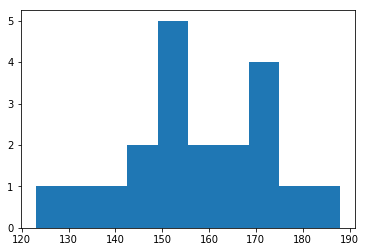

In [42]:
from matplotlib import pyplot
pyplot.hist(multistage.Weight)
pyplot.show()

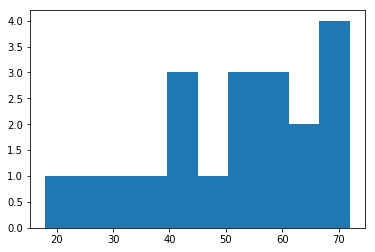

In [43]:
from matplotlib import pyplot
pyplot.hist(multistage.Age)
pyplot.show()

- [top of notebook](#top_of_notebook)
- [selection box](#selection_box)
- [load dataset](#load_dataset)